(569, 30)
(569, 2)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


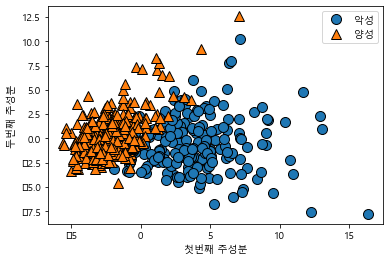

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


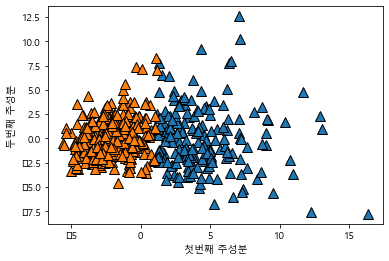

In [2]:
from matplotlib import font_manager, rc
import matplotlib
%matplotlib inline

# 한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()  # breast_cancer sample 데이터

# 각 특성의 분산이 1이 되도록 데이터의 스케일조정
scaler = StandardScaler()
scaler.fit(cancer.data)
X_Scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)        # 두 개의 주성분만 유지 .
pca.fit(X_Scaled)                # PCA 모델 

X_pca = pca.transform(X_Scaled)  # 두 개의 주성분만 유지하는 데이터 변환 (차원축소)  
print(X_Scaled.shape) # (569, 30)  569행 30열 
print(X_pca.shape)    # (569, 2)  차원 축소 후   569행 2열
# print(cancer.target)

import mglearn
import matplotlib.pyplot as plt
 
mglearn.discrete_scatter(X_pca[:, 0],X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()

# 군집화
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_Scaled)
mglearn.discrete_scatter(X_pca[:, 0],X_pca[:, 1],kmeans.labels_, markers='^')
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()